In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
from scipy.spatial.distance import cosine, squareform
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

In [40]:
def read_data(data_path):
    pmat = pd.read_csv(data_path, sep=' ', header=None)
    #pmat.set_index('Position', inplace=True)
    return pmat

In [41]:
def analyze_data(pmat):
    # Calculate cosine distance matrix
    distance_matrix = np.zeros((pmat.shape[1], pmat.shape[1]))
    for i in range(pmat.shape[1]):
        for j in range(i + 1, pmat.shape[1]):
            d_ij = cosine(pmat.iloc[:, i], pmat.iloc[:, j])
            distance_matrix[i, j] = d_ij
            distance_matrix[j, i] = d_ij

    # Convert the distance matrix to a condensed distance vector
    condensed_distance_vector = squareform(distance_matrix)

    # Perform neighbor joining
    linkage_matrix = hierarchy.linkage(condensed_distance_vector, method='average')
    
    return linkage_matrix

In [42]:
def plot_tree(linkage_matrix):
    # Plot dendrogram
    plt.figure(figsize=(25, 6))
    dendrogram = hierarchy.dendrogram(linkage_matrix, labels=pmat.columns, color_threshold=0.6, leaf_font_size=12)
    plt.xlabel('Cells', fontsize=14)
    plt.ylabel('Distance', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.xticks([])
    
    #return plt
    plt.show()

In [57]:
def get_cluster_samples(linkage_matrix, threshold, pmat_columns):
    # Get cluster labels based on threshold
    cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')
    
    # Create a dictionary to store samples for each cluster
    cluster_samples = {}
    
    # Iterate through unique cluster labels
    for cluster_label in np.unique(cluster_labels):
        # Get indices of samples belonging to the current cluster
        samples_in_cluster = [pmat_columns[i] for i, label in enumerate(cluster_labels) if label == cluster_label]
        
        # Only add clusters with at least two samples
        if len(samples_in_cluster) >= 2:
            cluster_samples[cluster_label] = samples_in_cluster
    
    return cluster_samples

In [74]:
data_path = '/Users/johard/Documents/mcmt/data/simulations_matrix_output/non_informative/1_10_cells_110_pos_10_iter.csv'


In [75]:
pmat

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.99999,0.99999,0.999992,0.99999,1.00000,0.0001,0.00010,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.00010,0.0001,0.000100,0.0001,0.0001,0.0001
1,0.99999,0.99999,0.999990,0.99999,0.99999,0.0001,0.00010,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.00010,0.0001,0.000100,0.0001,0.0001,0.0001
2,0.00010,0.00010,0.000100,0.00010,0.00010,0.0001,0.00010,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.00010,0.0001,0.000100,0.0001,0.0001,0.0001
3,0.00010,0.00010,0.000100,0.00010,0.00010,0.0001,0.00010,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.00010,0.0001,0.000100,0.0001,0.0001,0.0001
4,0.00010,0.00010,0.000100,0.00010,0.00010,0.0001,0.00010,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.00010,0.0001,0.000100,0.0001,0.0001,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.00010,0.00010,0.000100,0.00010,0.00010,0.0001,0.00010,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.00010,0.0001,0.000100,0.0001,0.0001,0.0001
136,0.00010,0.00010,0.000100,0.00010,0.00010,0.0001,0.99999,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.00010,0.0001,0.000100,0.0001,0.0001,0.0001
137,0.00010,0.00010,0.000100,0.00010,0.00010,0.0001,0.00010,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.00010,0.0001,0.000100,0.0001,0.0001,0.0001
138,0.00010,0.00010,0.000100,0.00010,0.00010,0.0001,0.00010,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.99999,0.0001,0.000100,0.0001,0.0001,0.0001


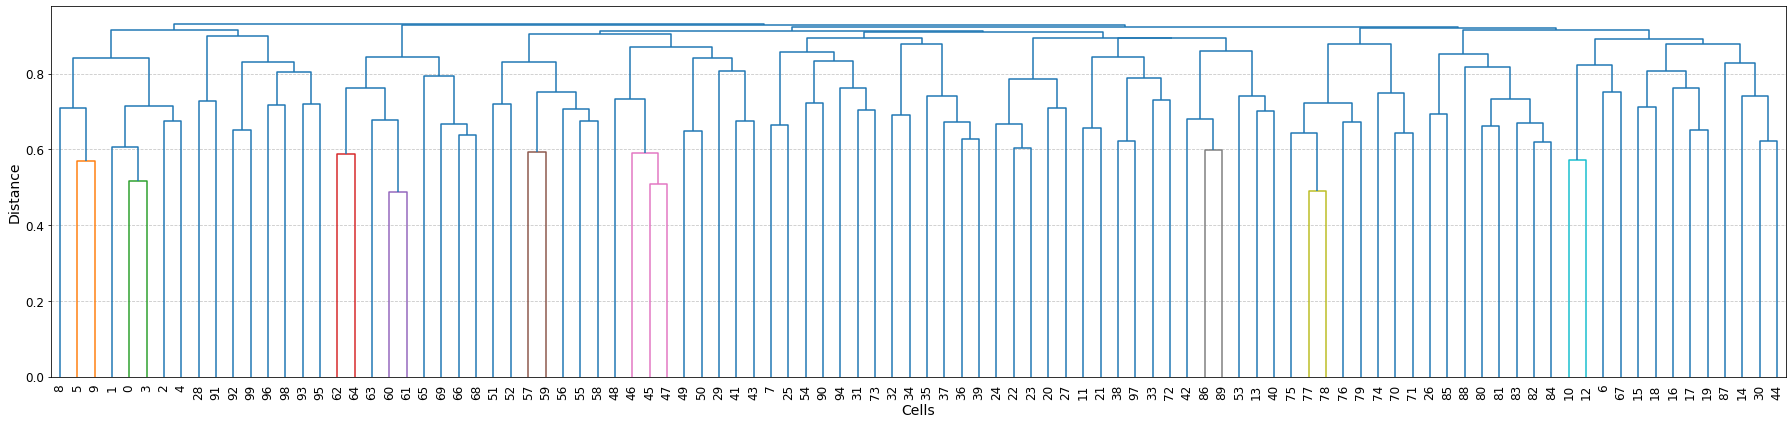

In [76]:
pmat = read_data(data_path)
linkage_matrix = analyze_data(pmat)
plot_tree(linkage_matrix)

In [77]:
threshold = 0.8  # Adjust threshold according to your dendrogram
cluster_samples = get_cluster_samples(linkage_matrix, threshold, pmat.columns)

# Print clusters with at least two samples
for cluster_label, samples in cluster_samples.items():
    print(f'Cluster {cluster_label}: {samples}')


Cluster 1: [5, 8, 9]
Cluster 2: [0, 1, 2, 3, 4]
Cluster 3: [28, 91]
Cluster 4: [92, 99]
Cluster 5: [96, 98]
Cluster 6: [93, 95]
Cluster 7: [60, 61, 62, 63, 64]
Cluster 8: [65, 66, 68, 69]
Cluster 9: [51, 52]
Cluster 10: [55, 56, 57, 58, 59]
Cluster 11: [45, 46, 47, 48]
Cluster 12: [49, 50]
Cluster 13: [41, 43]
Cluster 15: [7, 25]
Cluster 16: [54, 90]
Cluster 17: [31, 73, 94]
Cluster 18: [32, 34]
Cluster 19: [35, 36, 37, 39]
Cluster 20: [20, 22, 23, 24, 27]
Cluster 21: [11, 21]
Cluster 22: [33, 38, 72, 97]
Cluster 23: [42, 86, 89]
Cluster 24: [13, 40, 53]
Cluster 25: [75, 76, 77, 78, 79]
Cluster 26: [70, 71, 74]
Cluster 27: [26, 85]
Cluster 28: [80, 81, 82, 83, 84]
Cluster 30: [10, 12]
Cluster 31: [6, 67]
Cluster 32: [15, 18]
Cluster 33: [16, 17, 19]
Cluster 34: [14, 30, 44]
